# Early Diagnosis of Parkinson's Disease via keystrokes - Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
dfp = pd.read_csv('data/TappyData/cleanup/7XS9VOLXWU.csv', sep='\s+') # with PD
dfnp = pd.read_csv('data/TappyData/cleanup/0QAZFRHQHW.csv', sep='\s+') # no PD
dfp.head()

,UserKey,Date,Timestamp,Hand,Hold,Direction,Latency,Flight
0,7XS9VOLXWU,160918,10:23:48.234,L,175.8,LL,593.8,414.1
1,7XS9VOLXWU,160918,10:23:49.004,L,175.8,LL,769.5,593.8
2,7XS9VOLXWU,160918,17:45:50.203,L,195.3,LL,582.0,449.2
3,7XS9VOLXWU,160918,17:45:51.062,L,300.8,LL,753.9,558.6
4,7XS9VOLXWU,160919,15:27:42.918,L,164.1,LL,636.7,464.8


In [4]:
dfp.loc[:,'idx'] = range(len(dfp))
dfnp.loc[:,'idx'] = range(len(dfnp))
dfp.head();

In [5]:
dfp.columns

Index(['UserKey', 'Date', 'Timestamp', 'Hand', 'Hold', 'Direction', 'Latency',
       'Flight', 'idx'],
      dtype='object')

# Individual keystroke data exploration, one with PD, on without PD

## Hold time distribution

Text(0.5,1,'With PD, Hold time with Direction hue')

Text(0.5,35.736,'keystroke instance')

Text(0.5,1,'No PD, Hold time with Direction hue')

Text(0.5,35.736,'keystroke instance')

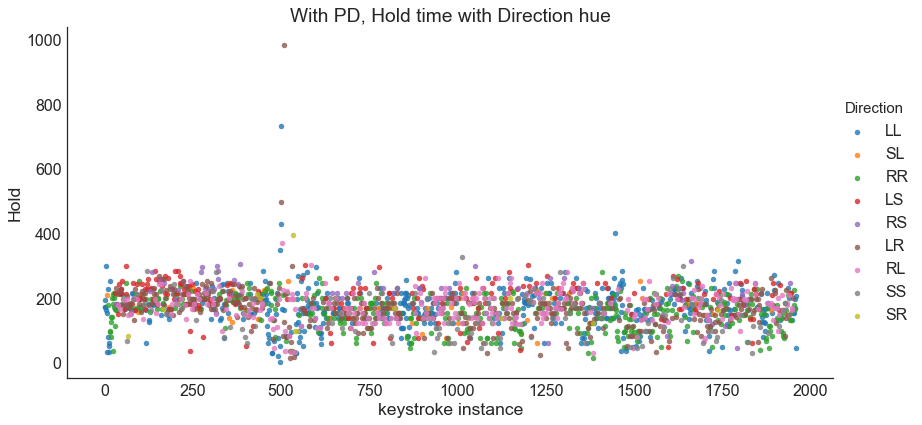

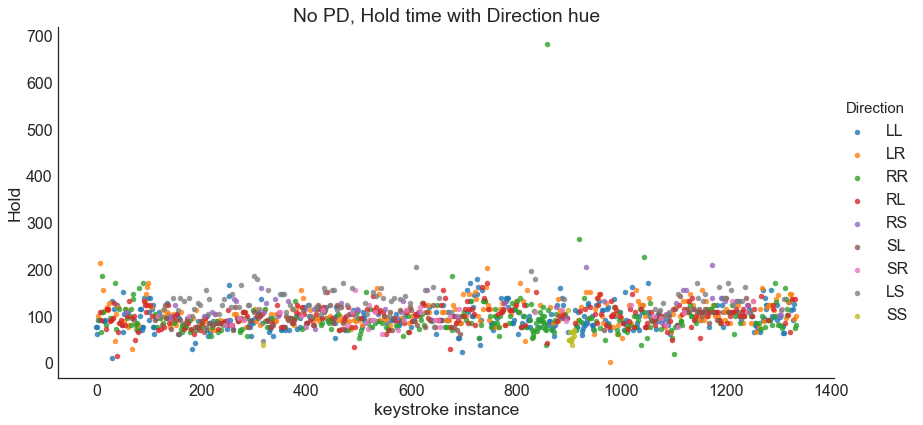

In [147]:
sns.lmplot(data=dfp, x='idx',y='Hold',fit_reg=False,scatter_kws={"s": 30},size=6, aspect=2,hue='Direction')
ax = plt.gca() # get current axes
ax.set_title('With PD, Hold time with Direction hue')
ax.set_xlabel('keystroke instance')

b = sns.lmplot(data=dfnp, x='idx',y='Hold',fit_reg=False,scatter_kws={"s": 30},size=6, aspect=2,hue='Direction')
ax = plt.gca() # get current axes
ax.set_title('No PD, Hold time with Direction hue')
ax.set_xlabel('keystroke instance')

Text(0.5,1,'With PD, Hold time with Hand hue')

Text(0.5,35.736,'keystroke instance')

Text(0.5,1,'With no PD, Hold time with Hand hue')

Text(0.5,35.736,'keystroke instance')

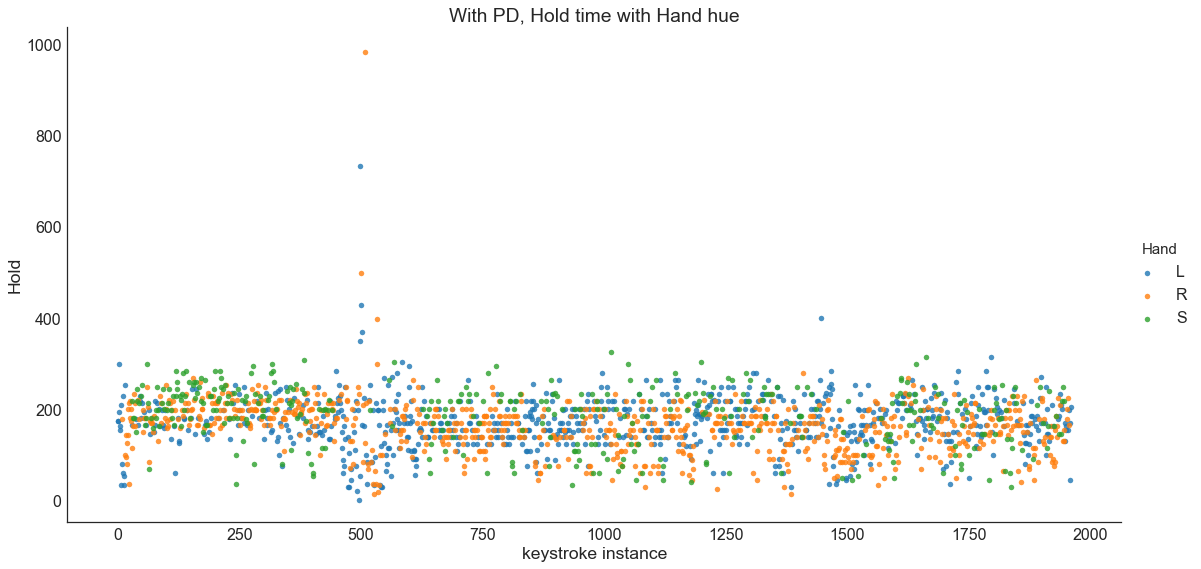

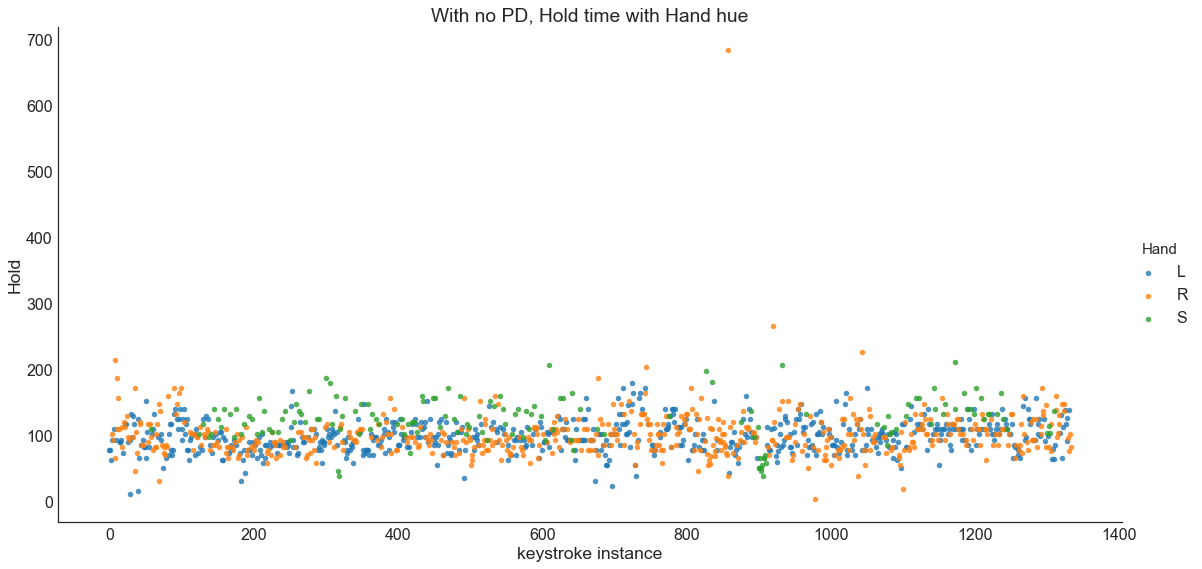

In [148]:
# sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2.5})
sns.lmplot(data=dfp, x='idx',y='Hold',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2,hue='Hand')
ax = plt.gca() # get current axes
ax.set_title('With PD, Hold time with Hand hue')
ax.set_xlabel('keystroke instance')

sns.lmplot(data=dfnp, x='idx',y='Hold',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2,hue='Hand')
ax = plt.gca() # get current axes
ax.set_title('With no PD, Hold time with Hand hue')
ax.set_xlabel('keystroke instance')


Text(0.5,1,'With PD, Flight time with Direction hue')

Text(0.5,35.736,'keystroke instance')

Text(0.5,1,'With no PD, Flight time with Direction hue')

Text(0.5,35.736,'keystroke instance')

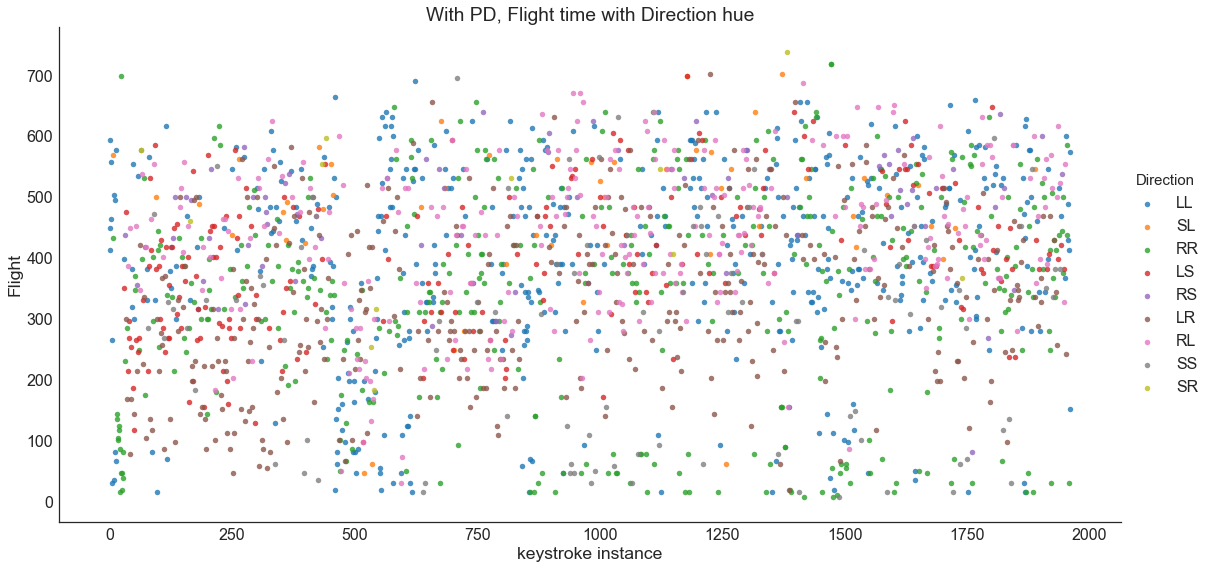

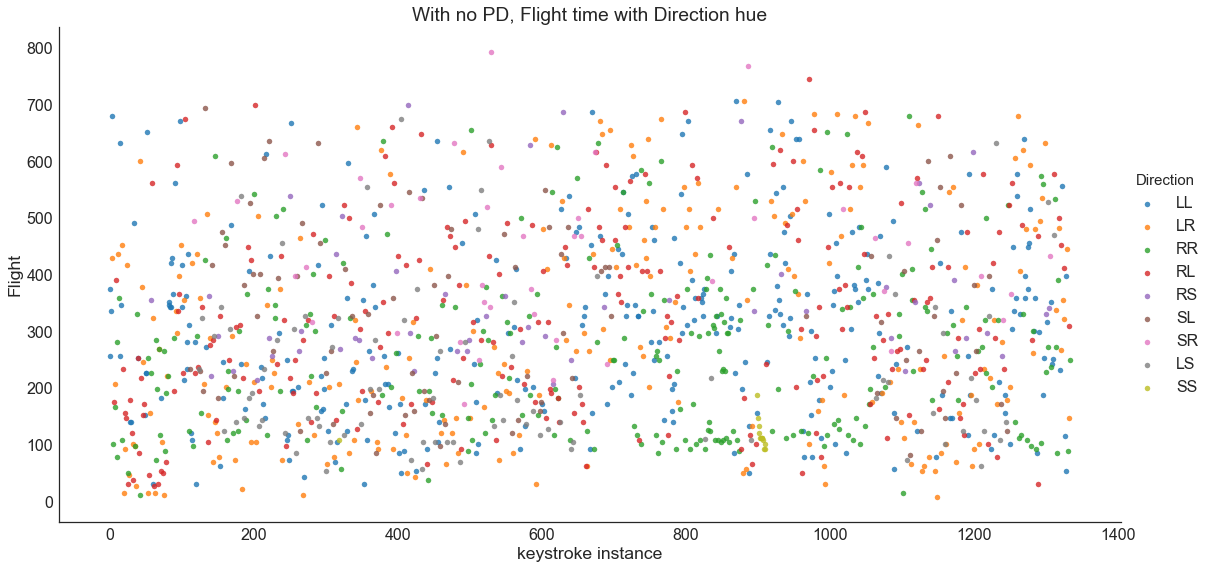

In [145]:
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2.5})
sns.set_style(style='white')
sns.lmplot(data=dfp, x='idx',y='Flight',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2,hue='Direction')
ax = plt.gca() # get current axes
ax.set_title('With PD, Flight time with Direction hue')
ax.set_xlabel('keystroke instance')

sns.lmplot(data=dfnp, x='idx',y='Flight',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2,hue='Direction')
ax = plt.gca() # get current axes
ax.set_title('With no PD, Flight time with Direction hue')
ax.set_xlabel('keystroke instance')

Text(0.5,1,'With PD, Flight time with Hand hue')

Text(0.5,35.736,'keystroke instance')

Text(0.5,1,'With no PD, Flight time with Hand hue')

Text(0.5,35.736,'keystroke instance')

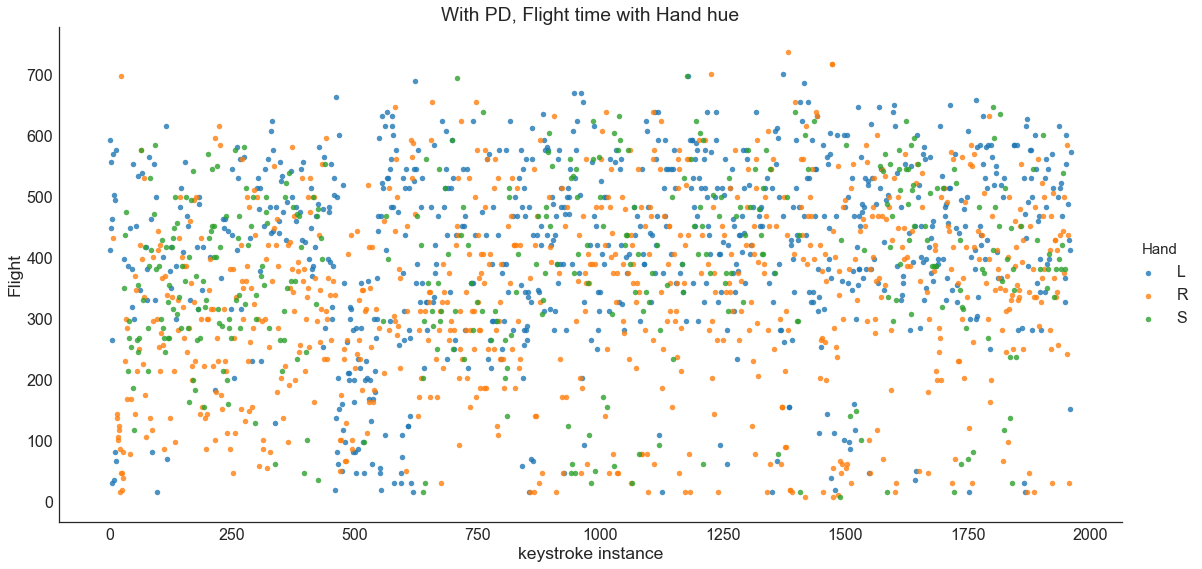

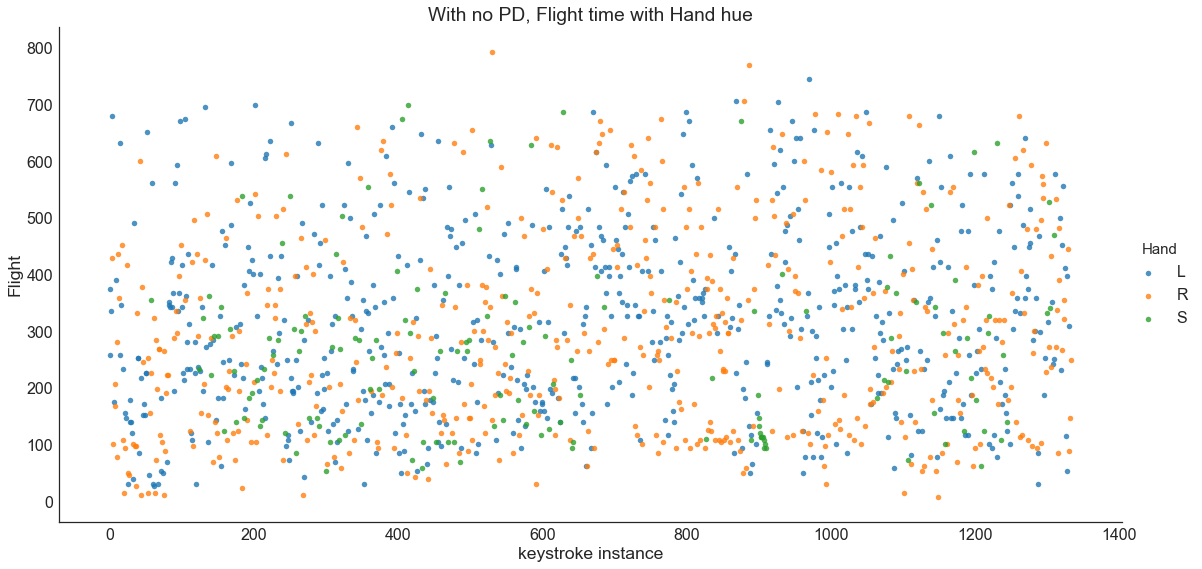

In [165]:
sns.lmplot(data=dfp, x='idx',y='Flight',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2,hue='Hand')
ax = plt.gca() # get current axes
ax.set_title('With PD, Flight time with Hand hue')
ax.set_xlabel('keystroke instance')

sns.lmplot(data=dfnp, x='idx',y='Flight',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2,hue='Hand')
ax = plt.gca() # get current axes
ax.set_title('With no PD, Flight time with Hand hue')
ax.set_xlabel('keystroke instance')

Text(0.5,1,'With PD, Flight time vs Hold time')

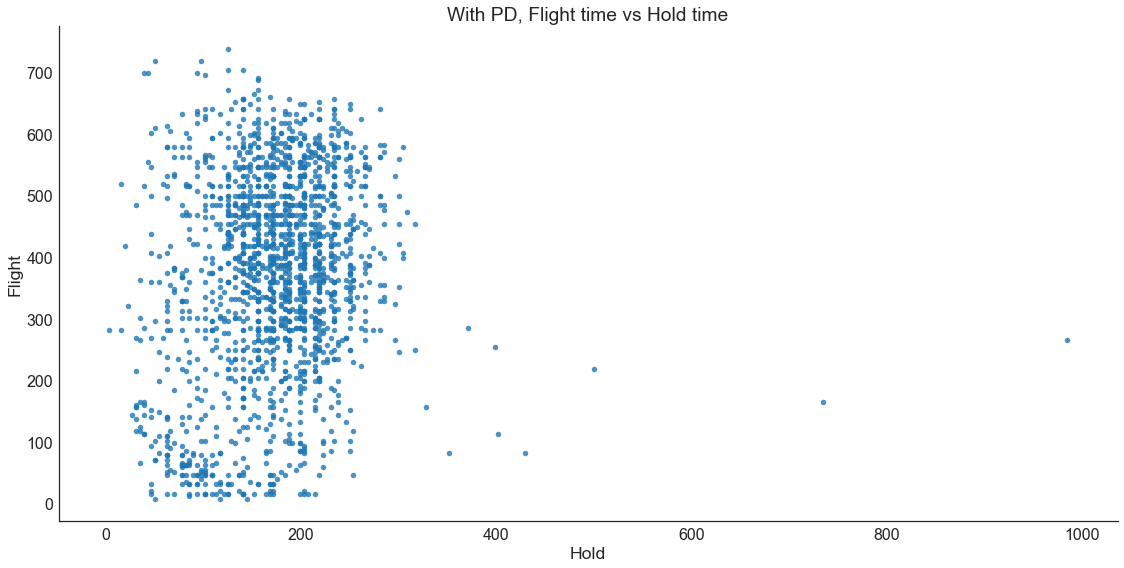

In [150]:
sns.lmplot(data=dfp, x='Hold',y='Flight',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2)
ax = plt.gca() # get current axes
ax.set_title('With PD, Flight time vs Hold time')

Text(0.5,1,'No PD, Flight time vs Hold time')

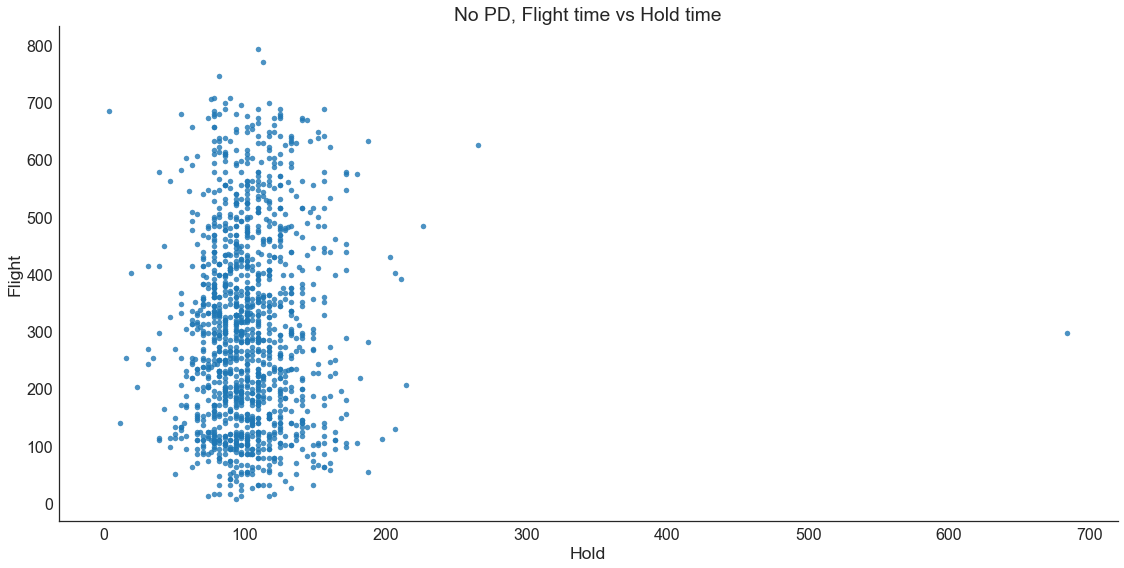

In [151]:
sns.lmplot(data=dfnp, x='Hold',y='Flight',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2)
ax = plt.gca() # get current axes
ax.set_title('No PD, Flight time vs Hold time')

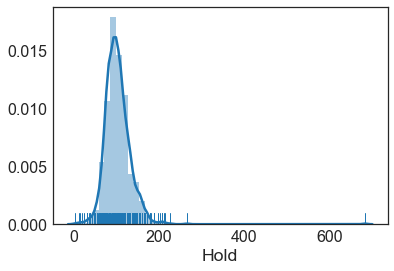

In [152]:
# plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
sns.distplot(dfnp['Hold'],rug=True)
# sns.distlot(data=dfnp, x='Hold',fit_reg=False,scatter_kws={"s": 30},size=8, aspect=2)
# ax = plt.gca() # get current axes
# ax.set_title('No PD, Flight time vs Hold time')

In [12]:
def locateBin(inTime):
    binRange = range(1,11)

    if (inTime) < 100: return 1 
    if (inTime) > 1000: return 10 
        
    significant = int(str(inTime)[0])

    return binRange[significant]


In [13]:
dfp.loc[:,'HTbins'] = dfp['Hold'].apply(locateBin)
dfp.loc[:,'FTbins'] = dfp['Flight'].apply(locateBin)
dfnp.loc[:,'HTbins'] = dfnp['Hold'].apply(locateBin)
dfnp.loc[:,'FTbins'] = dfnp['Flight'].apply(locateBin)

In [34]:
dfp.loc[:,['Hold','HTbins']];
dfp.loc[:,['Hold','FTbins']];

In [15]:
dfp[dfp.HTbins>0][['Hold','HTbins']]; # Verify bin allocation

### Hold time bin allocation 

In [16]:
dfp.HTbins.value_counts()
dfnp.HTbins.value_counts()

2     1128
3      595
1      217
4       16
5        2
10       1
8        1
6        1
Name: HTbins, dtype: int64

2    669
1    657
3      7
7      1
Name: HTbins, dtype: int64

### Flight time bin allocation

In [17]:
dfp.FTbins.value_counts()
dfnp.FTbins.value_counts()

4    467
5    437
6    402
3    267
1    158
2    131
7     94
8      5
Name: FTbins, dtype: int64

2    313
3    273
4    253
5    169
1    120
6    119
7     81
8      6
Name: FTbins, dtype: int64

In [18]:
dfp.head()

,UserKey,Date,Timestamp,Hand,Hold,Direction,Latency,Flight,idx,HTbins,FTbins
0,7XS9VOLXWU,160918,10:23:48.234,L,175.8,LL,593.8,414.1,0,2,5
1,7XS9VOLXWU,160918,10:23:49.004,L,175.8,LL,769.5,593.8,1,2,6
2,7XS9VOLXWU,160918,17:45:50.203,L,195.3,LL,582.0,449.2,2,2,5
3,7XS9VOLXWU,160918,17:45:51.062,L,300.8,LL,753.9,558.6,3,4,6
4,7XS9VOLXWU,160919,15:27:42.918,L,164.1,LL,636.7,464.8,4,2,5


In [19]:
dfp.loc[:,'idx'] = range(len(dfp))
dfnp.loc[:,'idx'] = range(len(dfnp))
dfp.head()

,UserKey,Date,Timestamp,Hand,Hold,Direction,Latency,Flight,idx,HTbins,FTbins
0,7XS9VOLXWU,160918,10:23:48.234,L,175.8,LL,593.8,414.1,0,2,5
1,7XS9VOLXWU,160918,10:23:49.004,L,175.8,LL,769.5,593.8,1,2,6
2,7XS9VOLXWU,160918,17:45:50.203,L,195.3,LL,582.0,449.2,2,2,5
3,7XS9VOLXWU,160918,17:45:51.062,L,300.8,LL,753.9,558.6,3,4,6
4,7XS9VOLXWU,160919,15:27:42.918,L,164.1,LL,636.7,464.8,4,2,5


Text(0.5,1,'With PD, HTbins with Direction hue')

Text(0.5,35.736,'keystroke instance')

Text(0.5,1,'No PD, HTbins time with Direction hue')

Text(0.5,35.736,'keystroke instance')

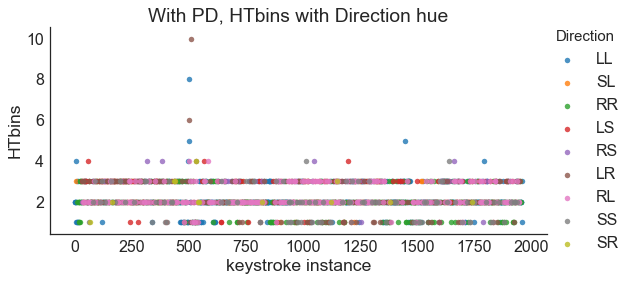

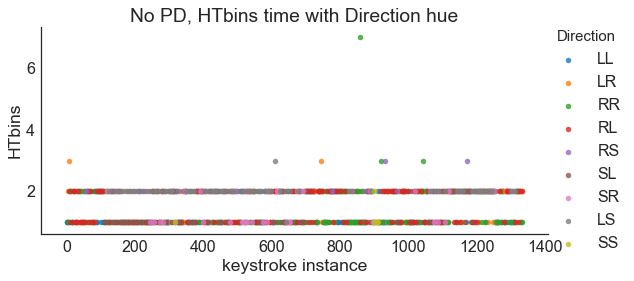

In [153]:
sns.lmplot(data=dfp, x='idx',y='HTbins',fit_reg=False,scatter_kws={"s": 30},size=4, aspect=2, hue='Direction')
ax = plt.gca() # get current axes
ax.set_title('With PD, HTbins with Direction hue')
ax.set_xlabel('keystroke instance')

sns.lmplot(data=dfnp, x='idx',y='HTbins',fit_reg=False,scatter_kws={"s": 30},size=4, aspect=2, hue='Direction')
ax = plt.gca() # get current axes
ax.set_title('No PD, HTbins time with Direction hue')
ax.set_xlabel('keystroke instance')

Text(0.5,1,'With PD, FTbins with Direction hue')

Text(0.5,35.736,'keystroke instance')

Text(0.5,1,'No PD, FTbins time with Direction hue')

Text(0.5,35.736,'keystroke instance')

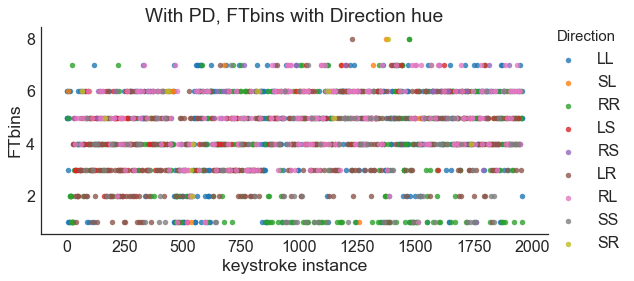

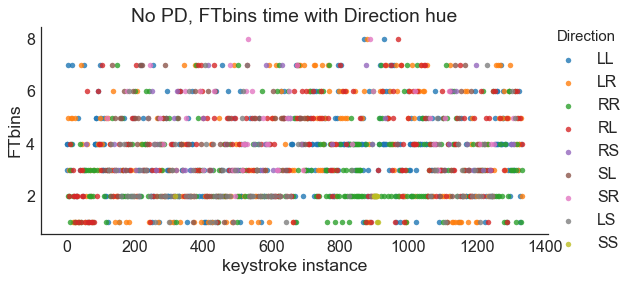

In [166]:
sns.lmplot(data=dfp, x='idx',y='FTbins',fit_reg=False,scatter_kws={"s": 30},size=4, aspect=2, hue='Direction')
ax = plt.gca() # get current axes
ax.set_title('With PD, FTbins with Direction hue')
ax.set_xlabel('keystroke instance')

sns.lmplot(data=dfnp, x='idx',y='FTbins',fit_reg=False,scatter_kws={"s": 30},size=4, aspect=2, hue='Direction')
ax = plt.gca() # get current axes
ax.set_title('No PD, FTbins time with Direction hue')
ax.set_xlabel('keystroke instance')

### Hold tiem and flight time distribution

Text(0.5,1,'Hold time distplot')

Text(0.5,1,'Flight time distplot')

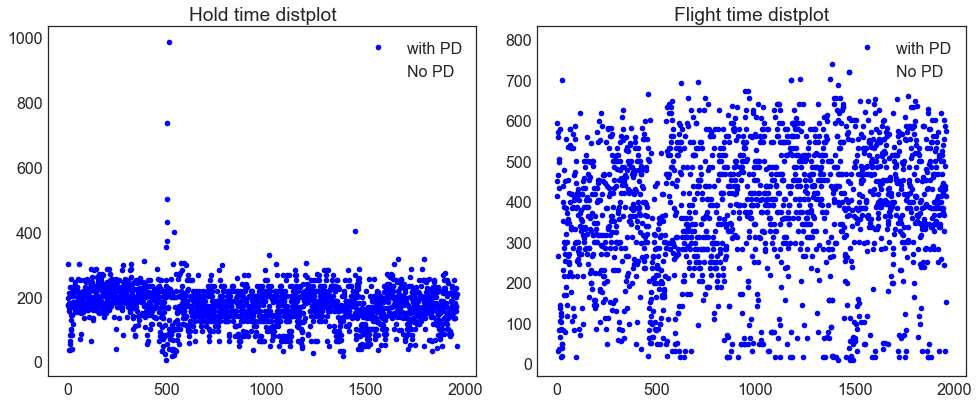

In [155]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(dfp['Hold'],'bo' )
ax1.plot(dfnp['Hold'],'g+', alpha=0.7)
ax2.plot(dfp['Flight'],'bo')
ax2.plot(dfnp['Flight'],'g+', alpha=0.7)
ax1.set_title('Hold time distplot')
ax1.legend(['with PD', 'No PD'])
ax2.set_title('Flight time distplot')
ax2.legend(['with PD', 'No PD'])
f.set_figheight(6)
f.set_figwidth(14)
plt.tight_layout()

(array([  2.17000000e+02,   1.12800000e+03,   5.95000000e+02,
          1.60000000e+01,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

(array([ 657.,  669.,    0.,    7.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]),
 <a list of 10 Patch objects>)

(array([ 158.,  131.,  267.,    0.,  467.,  437.,    0.,  402.,   94.,    5.]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

(array([ 120.,  313.,  273.,    0.,  253.,  169.,    0.,  119.,   81.,    6.]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'HTbins distplot')

Text(0.5,0,'bins')

Text(0,0.5,'count')

Text(0.5,1,'FTbins distplot')

Text(0.5,0,'bins')

Text(0,0.5,'count')

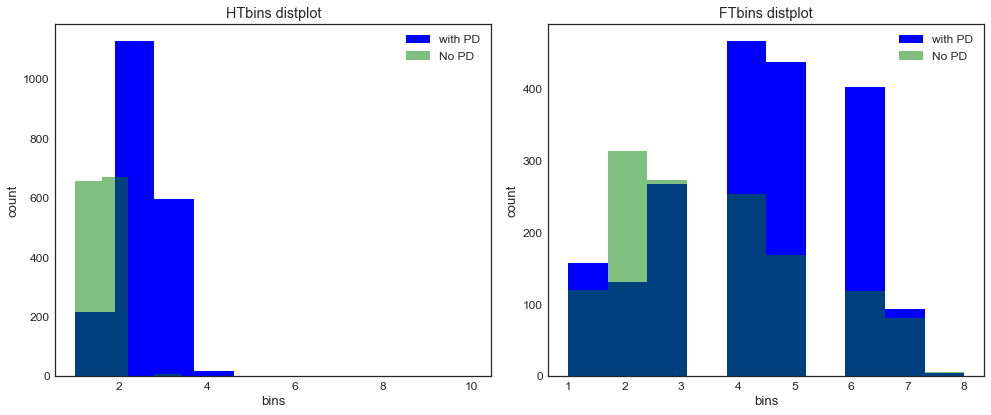

In [126]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(dfp['HTbins'],color='blue')
ax1.hist(dfnp['HTbins'],color='green', alpha=0.5)
ax2.hist(dfp['FTbins'],color='blue')
ax2.hist(dfnp['FTbins'],color='green', alpha=0.5)
ax1.set_title('HTbins distplot')
ax1.set_xlabel("bins")
ax1.set_ylabel("count")
ax1.legend(['with PD', 'No PD'])
ax2.set_title('FTbins distplot')
ax2.set_xlabel("bins")
ax2.set_ylabel("count")
ax2.legend(['with PD', 'No PD'])
f.set_figheight(6)
f.set_figwidth(14)
plt.tight_layout()

Text(0.5,1,'With PD')

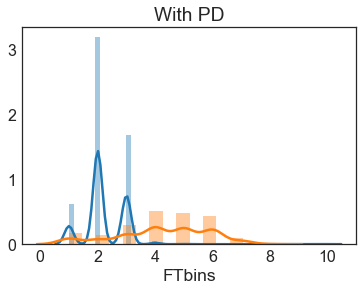

In [156]:
sns.distplot(dfp['HTbins'])
sns.distplot(dfp['FTbins'])
a = plt.gca()
a.set_title("With PD")

Text(0.5,1,'No PD')

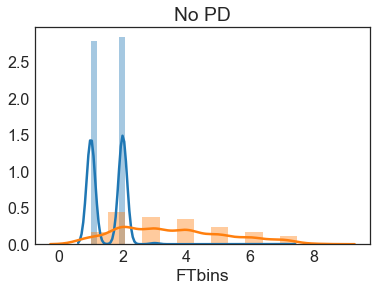

In [157]:
sns.distplot(dfnp['HTbins'])
sns.distplot(dfnp['FTbins'])
a = plt.gca()
a.set_title("No PD")

Text(0.5,1,'With Parkinson Disease Hold time bin violinplot')

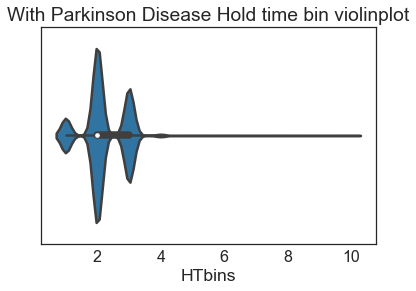

In [158]:
sns.violinplot(x=dfp['HTbins'])
a = plt.gca()
a.set_title('With Parkinson Disease Hold time bin violinplot')

Text(0.5,1,'No Parkinson Disease Hold time bin violinplot')

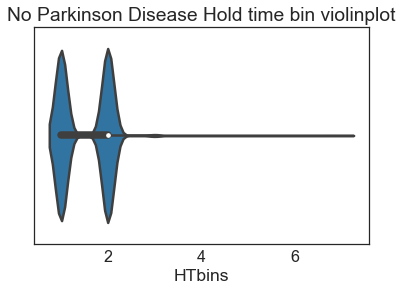

In [159]:
sns.violinplot(x=dfnp['HTbins'])
a = plt.gca()
a.set_title('No Parkinson Disease Hold time bin violinplot')

Text(0.5,1,'With Parkinson Disease Flight time bin violinplot')

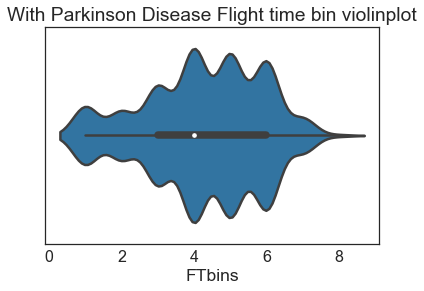

In [160]:
sns.violinplot(x=dfp['FTbins'])
a = plt.gca()
a.set_title('With Parkinson Disease Flight time bin violinplot')

Text(0.5,1,'No Parkinson Disease Flight time bin violinplot')

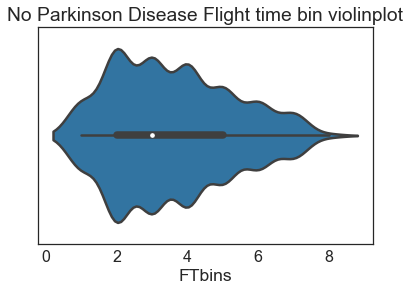

In [161]:
sns.violinplot(x=dfnp['FTbins'])
a = plt.gca()
a.set_title('No Parkinson Disease Flight time bin violinplot')

# All keystroke data combined (preprocessed, clean up, both Tappy and neuroQWERTY)

In [98]:
cleandf = pd.read_csv('dfData/withUserCleanDF.csv')

In [99]:
cleandf.tail(100)

,Unnamed: 0,Parkinson,UserKey,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10
200,202,1,IZBOYJGXXB,1682.758798,1.044995e+04,142.907970,167.535346,0.321819,0.313559,0.231924,...,0.138061,0.776979,0.084960,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
201,203,1,BZ8MQ2TBMS,810.502892,1.042437e+04,91.852281,156.404561,0.327474,0.398242,0.174572,...,0.572359,0.427641,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
202,204,1,UUIZH9TDXR,2318.486998,1.160913e+04,217.959516,424.179460,0.002085,0.020077,0.119242,...,0.005501,0.345403,0.603841,0.043976,0.001279,0.0,0.0,0.0,0.0,0.0
203,205,1,MQ6HDDONF0,1143.430437,1.461454e+04,153.753271,395.314953,0.000000,0.046729,0.177570,...,0.028037,0.869159,0.102804,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
204,206,1,TDQGZRB2SU,306.580496,7.756586e+03,78.080162,116.906157,0.477612,0.411692,0.072139,...,0.893657,0.106343,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
205,207,1,YNVRRFC8S4,1025.156894,3.214487e+04,97.248223,359.144924,0.071066,0.132826,0.245347,...,0.642978,0.348562,0.008460,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
206,208,1,E0TBSMYHQI,329.985359,1.466935e+04,83.423545,217.578836,0.280423,0.158730,0.251323,...,0.814815,0.185185,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
207,209,1,E7UA8EHENF,518.938688,2.689990e+04,101.161467,427.693132,0.025611,0.071013,0.139697,...,0.373690,0.625146,0.001164,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
208,210,1,JDWYGP605O,274.505536,2.632573e+04,68.362500,419.925000,0.000000,0.000000,0.375000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
209,211,1,LFKWFNOFEM,1404.560385,4.439947e+03,82.199859,109.110573,0.498360,0.387946,0.108632,...,0.681413,0.317087,0.001500,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Text(0.5,1,'Overall Hold time variance (blue w/Parkinson)')

(0, 6000)

Text(0.5,1,'Overall Hold time mean dist (blue w/Parkinson)')

Text(0.5,1,'Overall Flight time variance dist (blue w/Parkinson)')

Text(0.5,1,'Overall Flight time mean dist (blue w/Parkinson)')

<function matplotlib.pyplot.tight_layout>

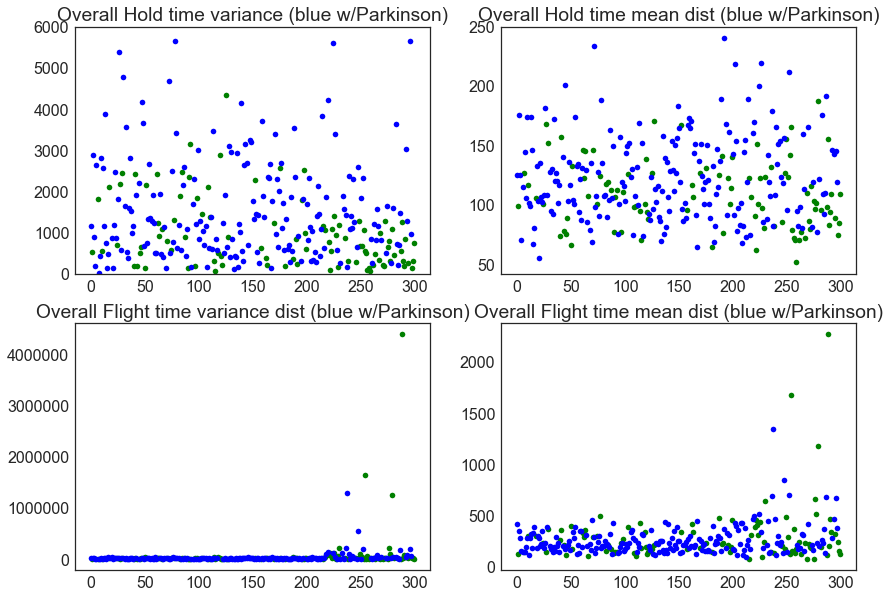

In [162]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
park0 = cleandf['Parkinson']==0
park1 = cleandf['Parkinson']==1

ax1.plot(cleandf[(park0)]['HTVar'],'go' )
ax1.plot(cleandf[(park1)]['HTVar'],'bo' )
ax1.set_title("Overall Hold time variance (blue w/Parkinson)")
ax1.set_ylim(0,6000)

ax2.plot(cleandf[(park0)]['HTmean'],'go' )
ax2.plot(cleandf[(park1)]['HTmean'],'bo' )
ax2.set_title("Overall Hold time mean dist (blue w/Parkinson)")

ax3.plot(cleandf[(park0)]['FTVar'],'go' )
ax3.plot(cleandf[(park1)]['FTVar'],'bo' )
ax3.set_title("Overall Flight time variance dist (blue w/Parkinson)")
# ax3.set_ylim(0,300000)

ax4.plot(cleandf[(park0)]['FTmean'],'go' )
ax4.plot(cleandf[(park1)]['FTmean'],'bo' )
ax4.set_title("Overall Flight time mean dist (blue w/Parkinson)")

f.set_figheight(10)
f.set_figwidth(14)
plt.tight_layout

In [122]:
cleandf

,Unnamed: 0,Parkinson,UserKey,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10
0,0,1,ZCPALNB4ZM,1159.336994,2.225126e+04,124.658260,418.255523,0.012708,0.076246,0.143695,...,0.234604,0.740958,0.024438,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0,IDYIDJBAXF,516.962542,4.191480e+03,98.701331,124.694140,0.384938,0.485074,0.122017,...,0.557256,0.442744,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,1,RYQGAPGNAM,2888.547405,1.686376e+04,175.307975,346.656442,0.000000,0.092025,0.319018,...,0.067485,0.619632,0.300613,0.012270,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,1,5PQVTWULAC,880.261337,1.817331e+04,125.230868,280.499562,0.051140,0.268141,0.306381,...,0.148353,0.845658,0.005989,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,1,4GUYFBZMK9,177.360998,7.682958e+03,70.229277,153.107970,0.290648,0.477152,0.159405,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,5,1,C6UGS6P0J0,2640.776501,8.477952e+03,115.268448,136.858512,0.405493,0.367333,0.162498,...,0.341413,0.605179,0.053407,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,6,0,FFNMFHHSZJ,1812.197253,8.247491e+03,126.456392,143.472325,0.378970,0.358401,0.198813,...,0.221611,0.736402,0.041987,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,7,1,6YXFEMHYZI,6.084000,3.780238e+03,144.500000,142.583333,0.166667,0.666667,0.166667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,8,1,V2SZVYXBOD,424.509194,8.694054e+03,105.787066,192.944113,0.186602,0.344602,0.329632,...,0.439438,0.560562,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,9,1,SYUUDFV8IU,2811.385881,2.996758e+04,174.033051,274.945448,0.189075,0.212023,0.182839,...,0.074083,0.614368,0.304565,0.006984,0.000000,0.0,0.0,0.0,0.0,0.0


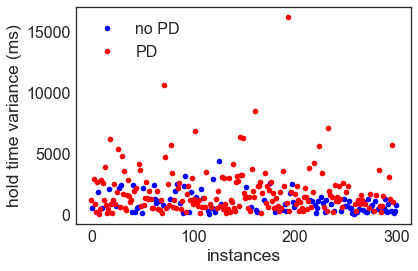

In [163]:
# p0 = cleandf[('Parkinson'==0)]
# p1 = cleandf[('Parkinson'==1)]
f, ax1 = plt.subplots()
ax1.plot(cleandf[park0]['HTVar'],'bo', label='no PD')
ax1.plot(cleandf[park1]['HTVar'],'ro', label='PD')
ax1.set_xlabel('instances')
ax1.set_ylabel('hold time variance (ms)')
plt.legend(loc='upper left');

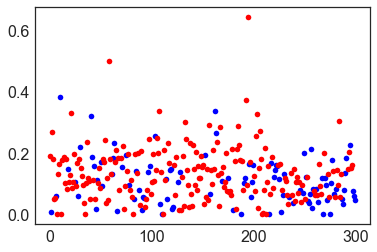

In [164]:
f, ax1 = plt.subplots()
ax1.plot(cleandf[park0]['FTbin4'],'bo')
ax1.plot(cleandf[park1]['FTbin4'],'ro')